# Plot Marginal KDE (for Adult)

In [1]:
import numpy as np
import scipy as sp
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import copy
import importlib
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True
sns.set_style("white")

In [2]:
#load data
with open('./data/ad_train_drop', 'rb') as handle:
    ad_train = pickle.load(handle)

#Move into vectors
y = ad_train['y']
x = ad_train['x'].values
D = ad_train['D']
N = ad_train['N']

with open('./data/ad_test_drop', 'rb') as handle:
    ad_test = pickle.load(handle)

#Move into vectors
y_test = ad_test['y']
x_test = ad_test['x'].values
N_test = ad_test['N']

In [3]:
#load parameters
par_nuts = pd.read_pickle('./parameters/par_nuts_logreg_ad_ARD_seed101')
par_advi = pd.read_pickle('./parameters/par_advi_logreg_ad_ARD_seed101')

a =1
b =1
par_bb = pd.read_pickle('./parameters/par_bb_logreg_c0_a{}_b{}_gN_ad_B2000_seed101'.format(a,b))


beta_nuts = par_nuts.iloc[:,9:D+9][0:2000]
alpha_nuts = par_nuts.iloc[:,D+9][0:2000]

beta_advi = par_advi.iloc[:,0:D]
alpha_advi = par_advi.iloc[:,D]

beta_bb = par_bb['beta'][:,0:D]
alpha_bb = par_bb['beta'][:,D]

FileNotFoundError: [Errno 2] No such file or directory: './parameters/par_nuts_logreg_ad_ARD_seed100'

NameError: name 'beta_nuts' is not defined

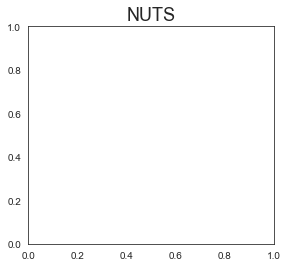

In [4]:
ind = 13
#ind = 5

f=plt.figure(figsize = (15,4))
plt.subplot(1,3,2)
plt.title('NUTS',fontsize = 18)
sns.distplot(beta_nuts['beta[{}]'.format(ind)])
plt.xlabel(r'$\beta_{{{}}}$'.format(ind),fontsize = 14)
plt.xlim(-1.5,0.5)
plt.ylim(0,6)
plt.ylabel('Posterior density',fontsize = 14)

plt.subplot(1,3,1)
sns.distplot(beta_bb[:,ind-1])
plt.title('Loss-NPL',fontsize = 18)
plt.xlabel(r'$\beta_{{{}}}$'.format(ind),fontsize = 14)
plt.xlim(-1.5,0.5)
plt.ylim(0,6)
plt.ylabel('Posterior density',fontsize = 14)

plt.subplot(1,3,3)
sns.distplot(beta_advi['beta[{}]'.format(ind)])
plt.title('ADVI',fontsize = 18)
plt.xlabel(r'$\beta_{{{}}}$'.format(ind),fontsize = 14)
plt.xlim(-1.5,0.5)
plt.ylim(0,6)
plt.ylabel('Posterior density',fontsize = 14)
